# Recommend me, Senpai

### Team: GIT -REKT

### Team
* Nicolas Botello
* Yang Yang
* Austin Tang
* Connor Flatt

# Overview & Motivation

## Have you ever wondered if a picture could say a thousand words? Or have you ever wondered if a picture has any influence on how we make decisions?  
These are questions the GIT -REKT team pondered on in the beginning of the “recommend me, senpai” project. The team received a dataset on “myanimelist.com” from a fellow researcher. The dataset holds a massive amount of data containing reviews from users and anime image links. In addition, we found a great library called illustration2vec that analyzes anime images and gives back labels to the images sent to the library. With this data and illustration2vec we could, find answers to the initial questions asked at the beginning of our analysis.   
Since we had anime photos and a library to analyze them with, we decided to give a more focused question compared to our initial questions. 


## Related Work
We found movie content-based recommendation systems interesting and wanted to predict if someone will enjoy something based of an image. We also found [illustration2vec](http://illustration2vec.net/papers/illustration2vec-main.pdf) and there paper which really seemed to be great for extracting data from anime pictures. Google photos tag searching was a great example of extracting metadata tags to be able identify pictures. 

### The main question we decided to solve was, can we judge a video by it’s cover?

# Initial Analysis

The data that is loaded in, was extracted from following the scripts in the READ.md file. Which from all the database of 'myanimelist.com' database was filtered down to only anime. We then extracted just the cover photo for each image and utilized that. In order to retrieve more pictures we scraped 'myanimelist.com' and each anime to retrieve more information after we did our first analyses and felt we needed more pictures. 

### Load In Information

Bring in information that contains all the labels and only bring in labels that have higher than a 50% chance of being inside the picture

In [1]:
import json, os 
base_path=''
json_data_path= os.path.join(base_path,'labels-min.json')
json2_data_path= os.path.join(base_path,'labels2-min.json')
rows = []
label_freq= {}
numOfLabelsPerAnime =[]
total_labels=0
for data_path in [json_data_path, json2_data_path]:
    with open(data_path,'r') as labels_file:
        for line in labels_file:
            labels = {}
            pic=json.loads(line)
            labels["id"]=pic["id"]
            labels_dict = pic["labels"][0]
            #there is no need for 
            #copyright : gives u anime names nt needed
            #character :gives name of character in pic
            #rating :says if image is safe or not
            #general :gives general labels
            for item in labels_dict["general"]:
                if item[1] > .5:
                    total_labels+=1
                    labels[item[0]]=item[1]
                    #find occuerences of labels
                    if item[0] in label_freq:
                        label_freq[item[0]]= label_freq[item[0]] +1
                        #print label_freq[item[0]]
                    else:
                        label_freq[item[0]]=1
                    numOfLabelsPerAnime.append(len(labels)-1)
            rows.append(labels)

Number of records of pictures that we have with labels

In [2]:
print len(rows)

13084


The Avg number of labels per picture  
Max and min

In [3]:
print "Average: " + str(sum(numOfLabelsPerAnime)/len(numOfLabelsPerAnime))
print "Max: " + str(max(numOfLabelsPerAnime))
print "Min: " + str(min(numOfLabelsPerAnime))

Average: 4
Max: 32
Min: 1


Get Percentage of times labels showed up in complete dataset

In [4]:
#convert from just occurences to percentage

for key,value in label_freq.iteritems():
    label_freq[key]=  float(value)/ total_labels

In [5]:
import pandas as pd

df = pd.DataFrame(rows)               

Example of data:  
Each column is a label that belongs to a picture and the value is the percentage of how reliable that is found inside the picture

In [6]:
df=df.fillna(value=0)
df.head()

,1boy,1girl,2boys,2girls,3boys,3girls,4girls,5girls,6+girls,:3,...,white legwear,white panties,wings,witch hat,wolf ears,wrist cuffs,yellow eyes,younger,yuri,zettai ryouiki
0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.55814,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.575337,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [8]:
from plotly.graph_objs import *
init_notebook_mode(connected=True)


In [9]:
from operator import itemgetter
sorted_freq = sorted(label_freq.items(), key=itemgetter(1))

In [10]:
lists = zip(*sorted_freq)

In [11]:
data = [Bar(
            x=lists[0],
            y=lists[1],
    )]
layout = Layout(title="Label percentage compared to total label dataset")
fig = Figure(data=data,layout=layout)
iplot(fig, filename='basic-bar2')

Based on the data above we can see that there is a big gap between the percentage of times other labels besides those labels above 1% come out.

Basic code in order to create Radar Graphs

In [12]:
import numpy as np
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection


def radar_factory(num_vars, frame='circle'):
    """Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle' | 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)
    # rotate theta such that the first axis is at the top
    theta += np.pi/2

    def draw_poly_patch(self):
        verts = unit_poly_verts(theta)
        return plt.Polygon(verts, closed=True, edgecolor='k')

    def draw_circle_patch(self):
        # unit circle centered on (0.5, 0.5)
        return plt.Circle((0.5, 0.5), 0.5)

    patch_dict = {'polygon': draw_poly_patch, 'circle': draw_circle_patch}
    if frame not in patch_dict:
        raise ValueError('unknown value for `frame`: %s' % frame)

    class RadarAxes(PolarAxes):

        name = 'radar'
        # use 1 line segment to connect specified points
        RESOLUTION = 1
        # define draw_frame method
        draw_patch = patch_dict[frame]

        def fill(self, *args, **kwargs):
            """Override fill so that line is closed by default"""
            closed = kwargs.pop('closed', True)
            return super(RadarAxes, self).fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super(RadarAxes, self).plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.concatenate((x, [x[0]]))
                y = np.concatenate((y, [y[0]]))
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            return self.draw_patch()

        def _gen_axes_spines(self):
            if frame == 'circle':
                return PolarAxes._gen_axes_spines(self)
            # The following is a hack to get the spines (i.e. the axes frame)
            # to draw correctly for a polygon frame.

            # spine_type must be 'left', 'right', 'top', 'bottom', or `circle`.
            spine_type = 'circle'
            verts = unit_poly_verts(theta)
            # close off polygon by repeating first vertex
            verts.append(verts[0])
            path = Path(verts)

            spine = Spine(self, spine_type, path)
            spine.set_transform(self.transAxes)
            return {'polar': spine}

    register_projection(RadarAxes)
    return theta


def unit_poly_verts(theta):
    """Return vertices of polygon for subplot axes.

    This polygon is circumscribed by a unit circle centered at (0.5, 0.5)
    """
    x0, y0, r = [0.5] * 3
    verts = [(r*np.cos(t) + x0, r*np.sin(t) + y0) for t in theta]
    return verts

Code to help generate graphs based few values without having to repeat same code over and over

In [13]:
def createGraph(values, title):
    keys_L = values.keys()
    print str(len(keys_L))
    values_L = values.values()
    print str(len(values_L))
    theta = radar_factory(len(keys_L), frame='circle')
    data = values_L
    fig = plt.figure(figsize=(50, 50))
    fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)
    colors = ['b', 'r', 'g', 'm', 'y']
    ax = fig.add_subplot(2, 2, 1, projection='radar')
    ax.set_title(title, weight='bold', size='medium', position=(0.5, 1.1),
                 horizontalalignment='center', verticalalignment='center')
    ax.plot(theta, data, color=colors[0])
    ax.fill(theta, data, facecolor=colors[0], alpha=0.25)
    ax.set_varlabels(keys_L)
    plt.show()

size: 24
24
24


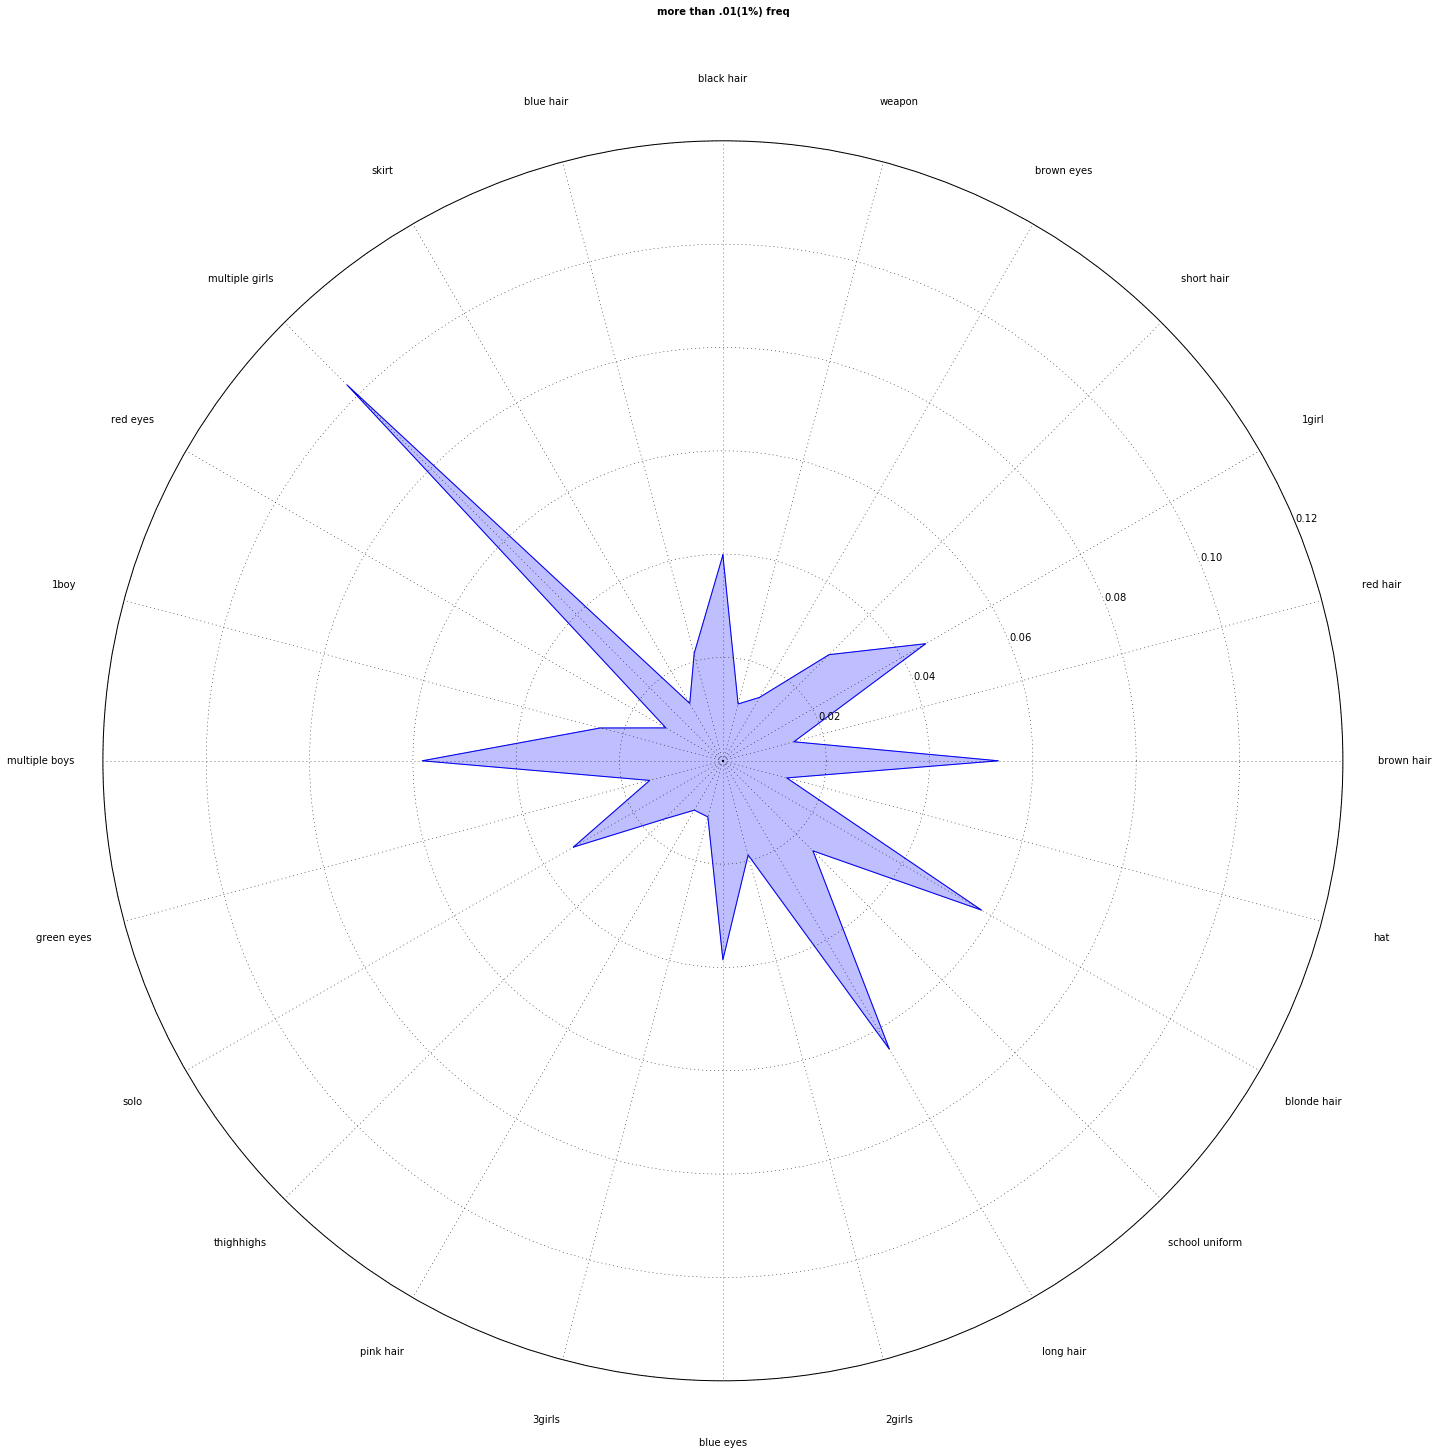

In [52]:
higher_30_dict= {k:v for (k,v) in label_freq.items() if v > .01 }
print "size: "+ str(len(higher_30_dict))
createGraph(higher_30_dict,"more than .01(1%) freq")
keys_H30 = higher_30_dict.keys()
values_H30 = higher_30_dict.values()
theta = radar_factory(len(keys_H30), frame='circle')
data = values_H30

### Observations
so based on the radar chart created above we are able to see that a lot of the labels that do come out relate to the gender number in each picture as well as other very specific traits such as eye color and hair color.   
So we should test removing the labels higher than 1% occurence and see how that helps for recommending.

size: 284
284
284


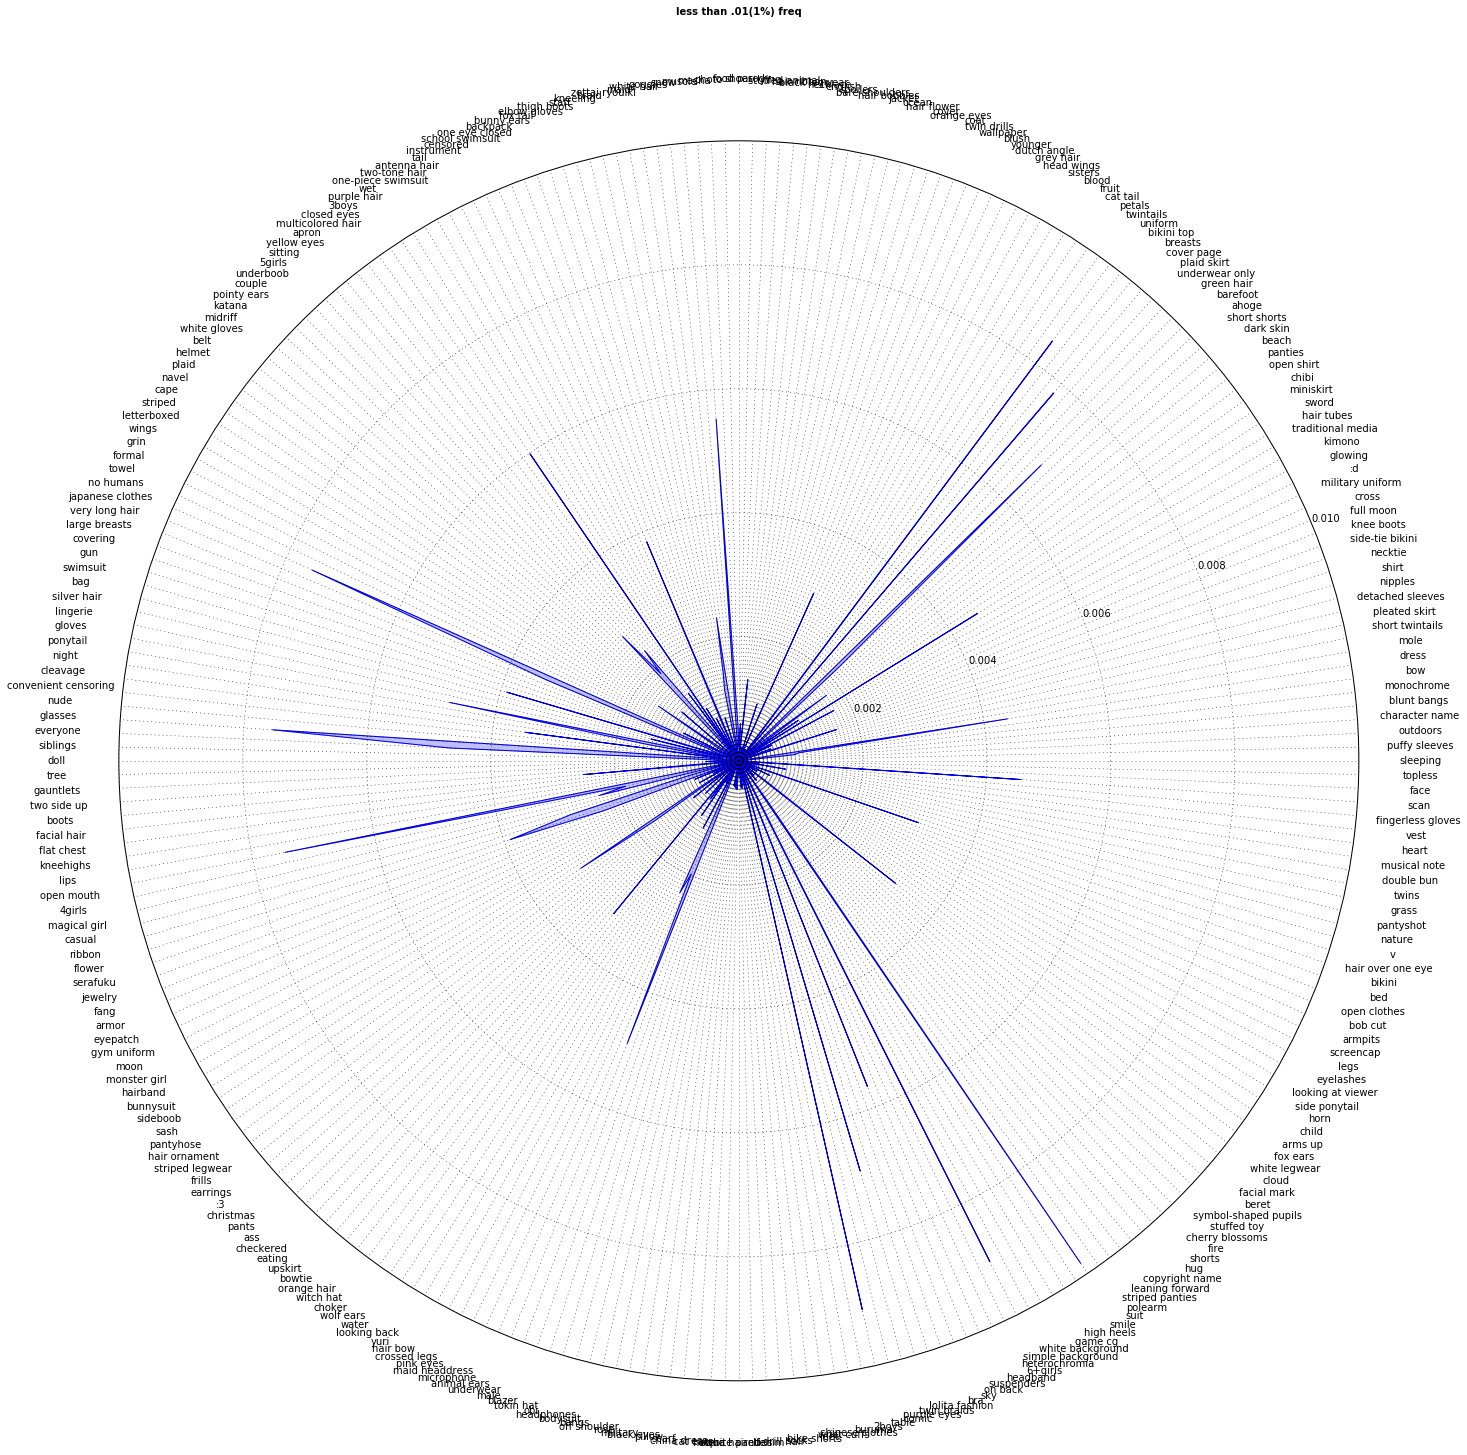

In [15]:
lower_30_dict= {k:v for (k,v) in label_freq.items() if v < .01 }
print "size: "+ str(len(lower_30_dict))
createGraph(lower_30_dict,"less than .01(1%) freq")

size: 56
56
56


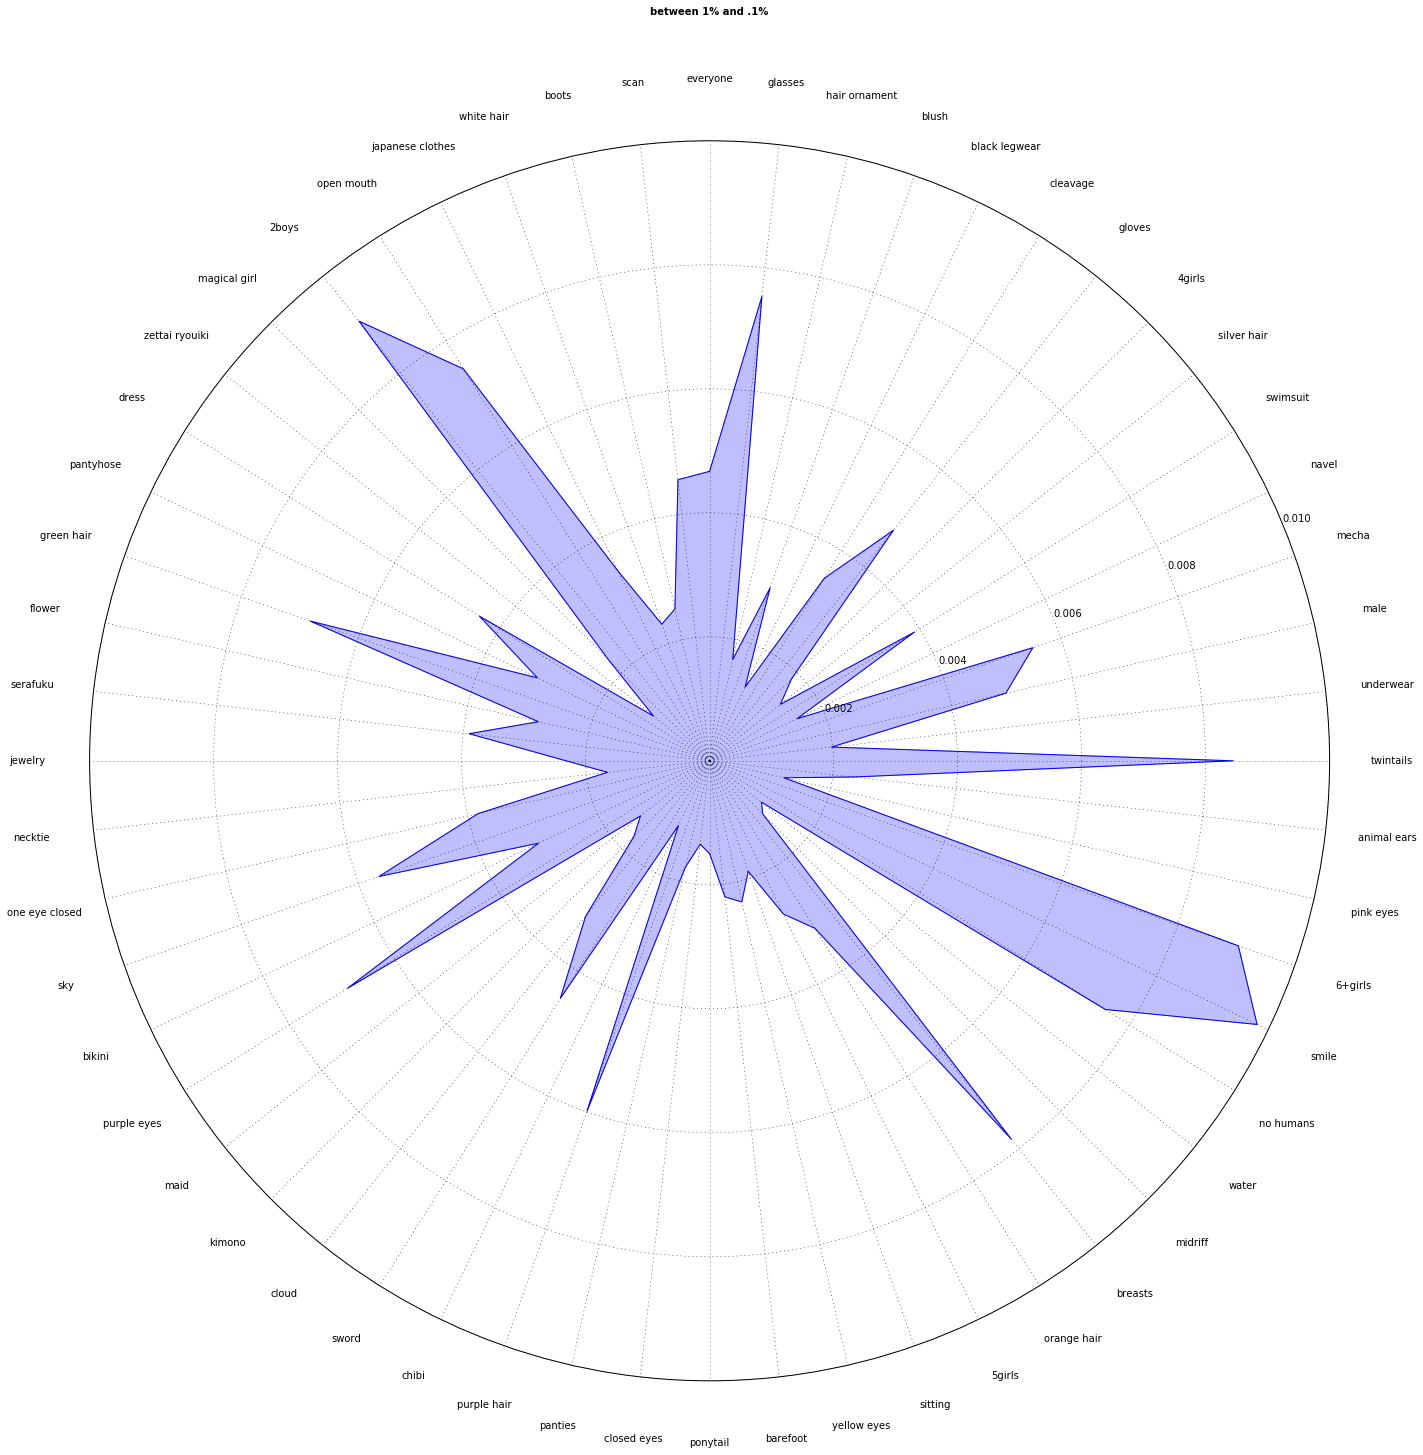

In [16]:
test_dict= {k:v for (k,v) in label_freq.items() if v < .01 and v >.001 }
print "size: "+ str(len(test_dict))
createGraph(test_dict,"between 1% and .1%")

## Observation
Based on the radar graph above we can see that the labels that are between 1% and .1% give a lot more meeting such as weapons, sword, bikini, maid, mecha, animal ears. There is still some very specific traits that people might not use such as smile, closed eyes, yellow eyes.

size: 28
28
28


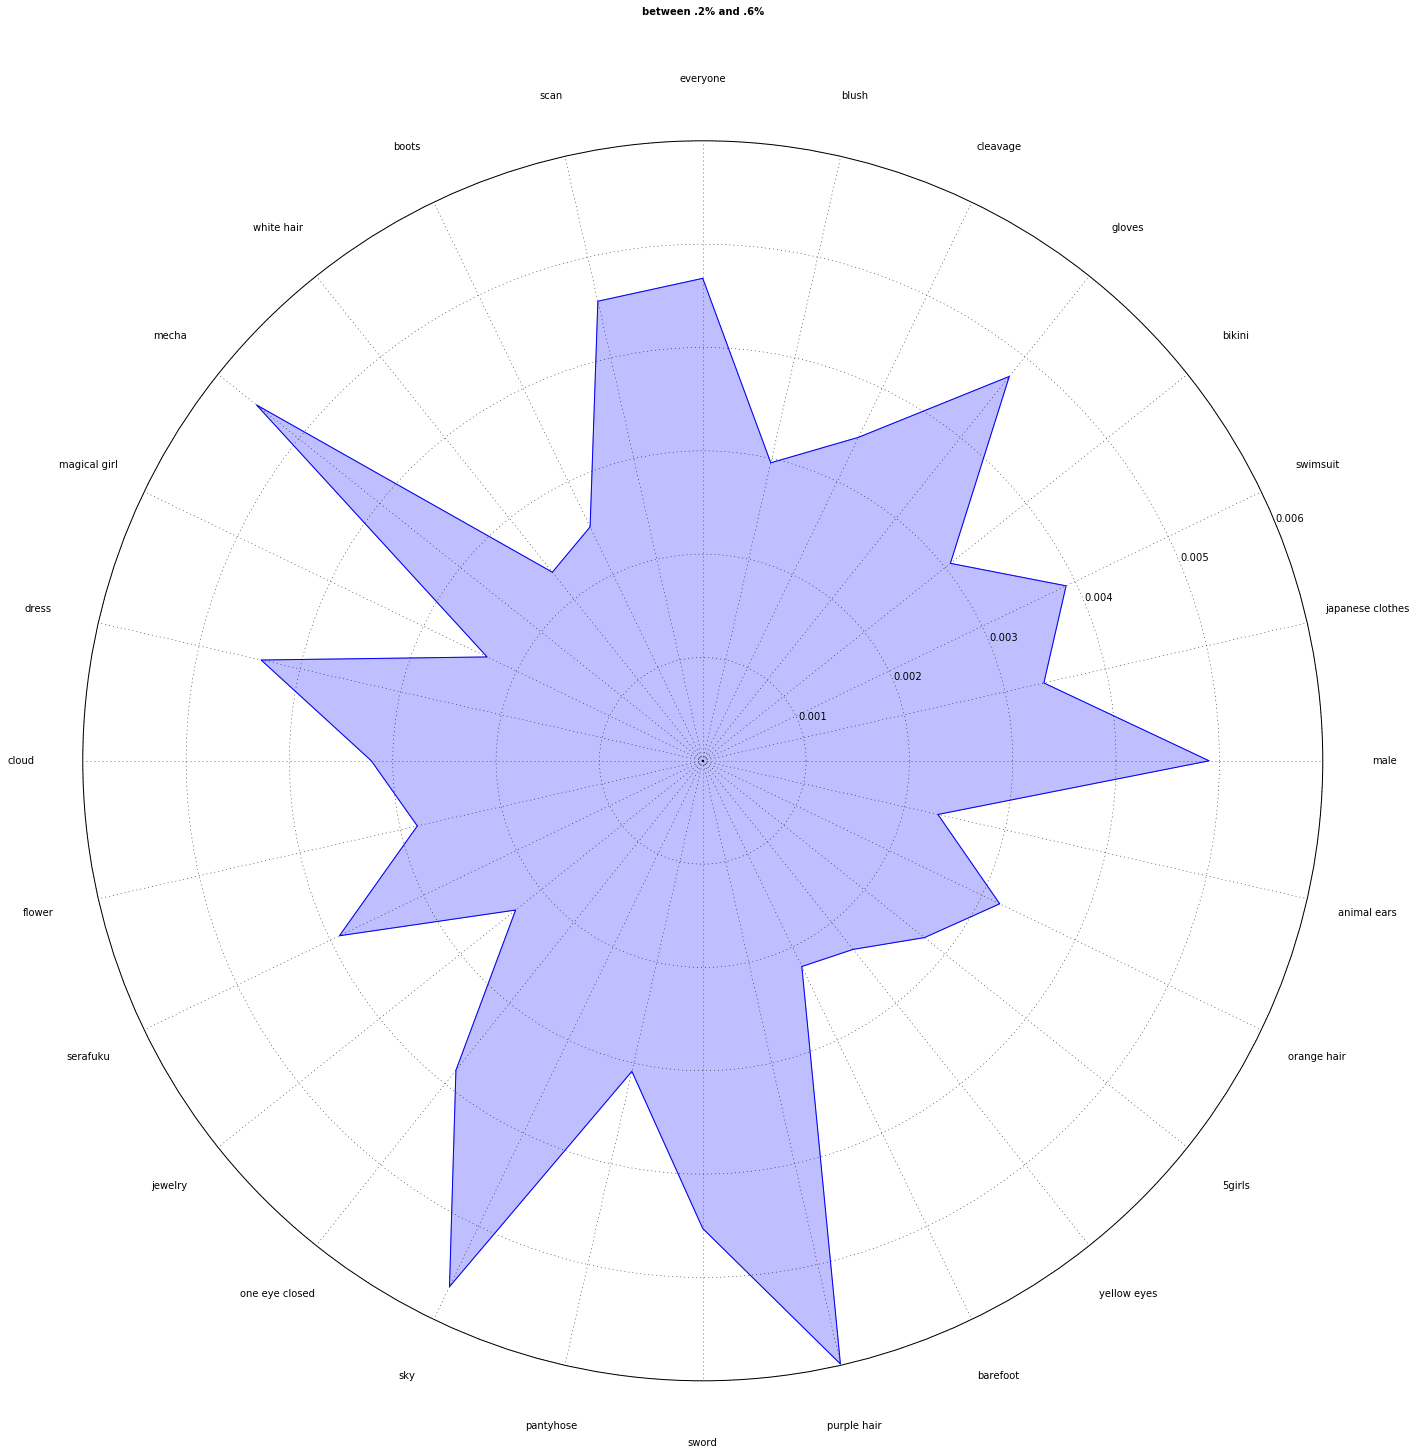

In [17]:
test_dict= {k:v for (k,v) in label_freq.items() if v < .006 and v >.002 }
print "size: "+ str(len(test_dict))
createGraph(test_dict,"between .2% and .6%")

size: 228
228
228


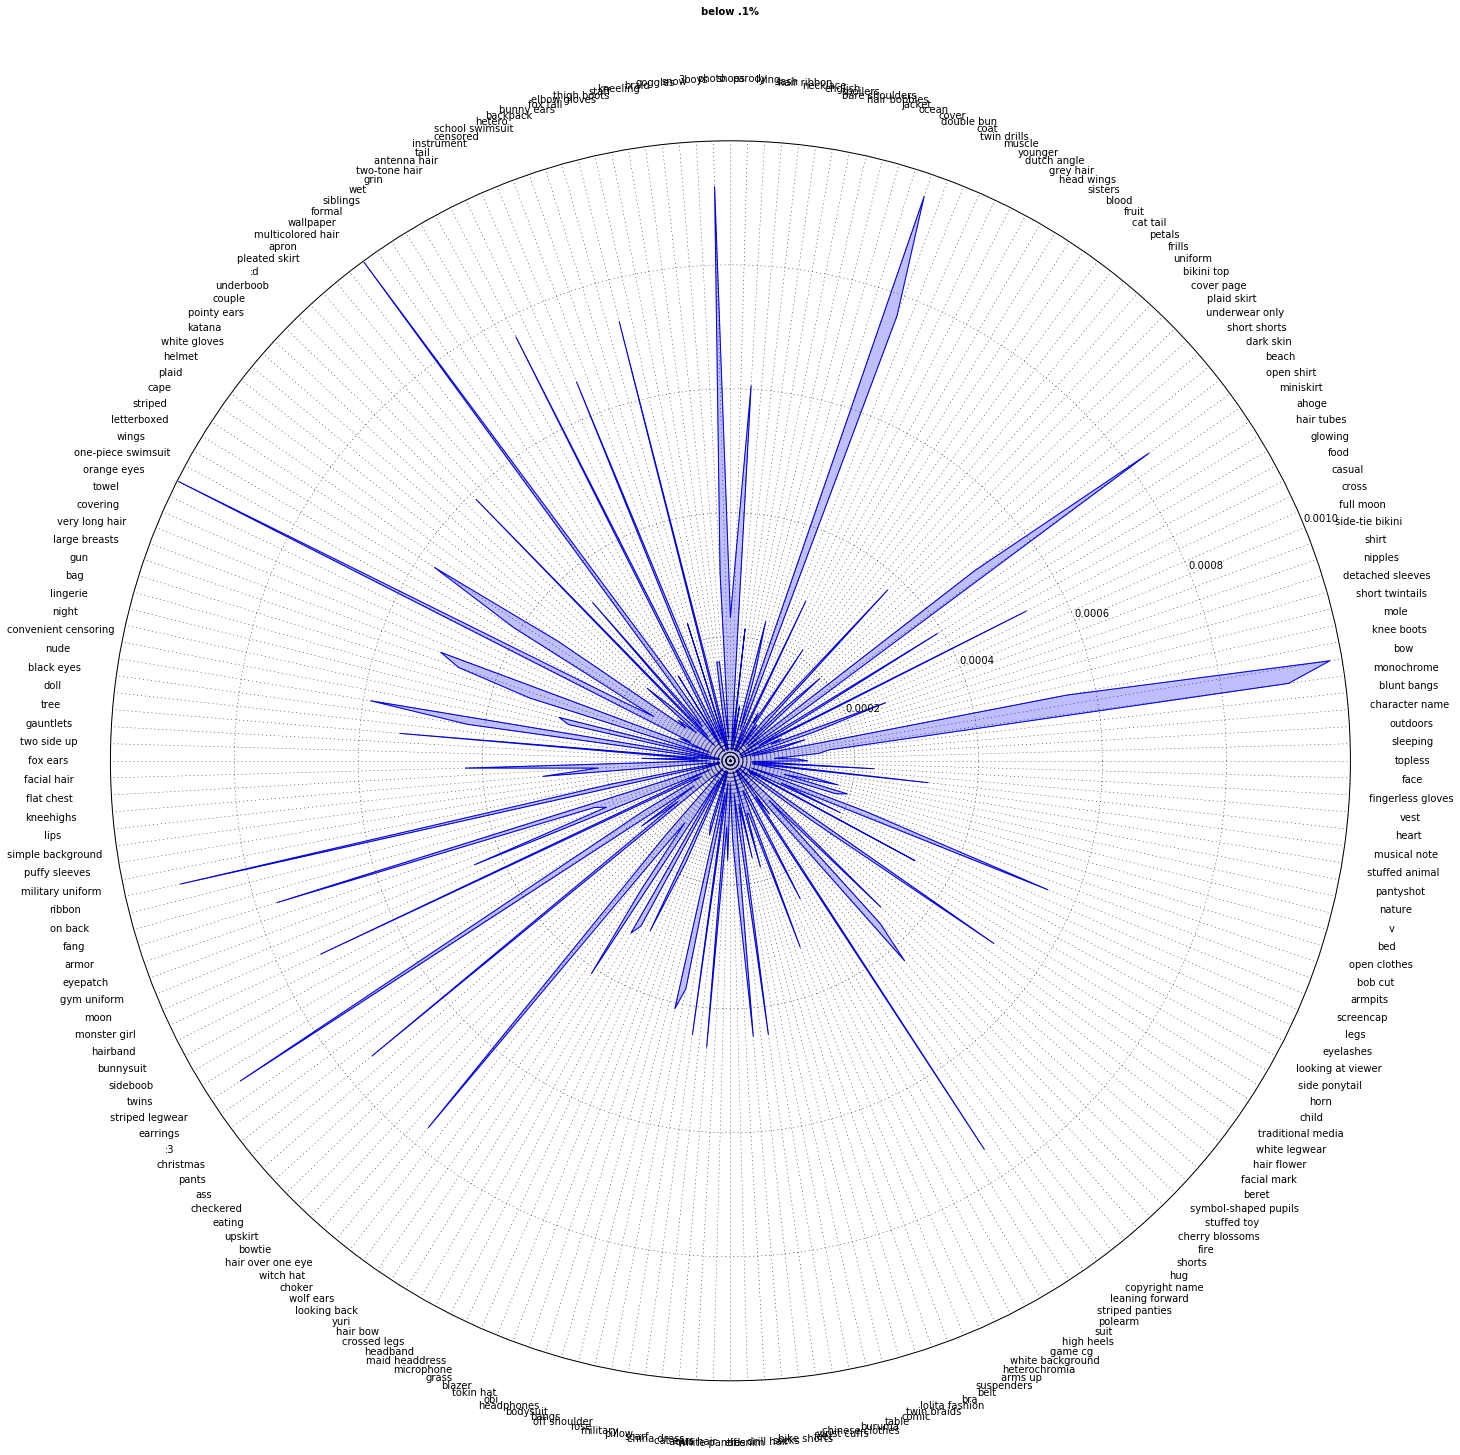

In [18]:
test_dict= {k:v for (k,v) in label_freq.items() if v < .001 }
print "size: "+ str(len(test_dict))
createGraph(test_dict,"below .1%")

### load user animes with ids and pics urls

In [19]:
json_data_path_anime='anime-min.json'
with open(json_data_path_anime,'r') as anime_dict_json:
    anime_dict = json.load(anime_dict_json)
anime_rows = []
for key,value in anime_dict.items():
    value["id"]=key
    anime_rows.append(value)

In [20]:
anime_df = pd.DataFrame(anime_rows) 

In [21]:
anime_df.head()

,id,image,title
0,890.0,http://cdn.myanimelist.net/images/anime/12/211...,Yuusha-Ou GaoGaiGar
1,2151.0,http://cdn.myanimelist.net/images/anime/1/2296...,Nils no Fushigi na Tabi
2,22507.0,http://cdn.myanimelist.net/images/anime/3/6483...,Initial D Final Stage
3,23421.0,http://cdn.myanimelist.net/images/anime/3/7564...,Re:␣Hamatora
4,1167.0,http://cdn.myanimelist.net/images/anime/11/379...,Samurai Gun


# Predicting genres from labels:

Now, we need to predict an anime's genres from its images' labels. We were using one vs rest classfication with linear SVC. At first we tried to use PCA/CCA to transform the data, and plot the graph for 2 labels. Then we try without PCA/CCA, we did a train_test split, trained our classifer, and evaluate the classification with hamming_loss. In the end, we got a hamming_loss score of 0.097, which means less than 10% of animes have incorrect genres, relatively accurate. 


Steps: 

1. Load genre data
2. Binarize the data
3. Do classification, plot with PCA/CCA
4. Without PCA/CCA, train model and evaluate classification with hamming_loss


In [22]:
df['id_new']=df['id'].astype(float).astype(int)

#print len(df['id_new'].unique())


### Load in genres from anime.json

In [23]:
json_data_path='anime.json'
#only contain the following fields
fields = ["title","genres"]
output_path='anime-min.json'
anime_dic = {}

with open(json_data_path,'r') as anime_file:
    for anime in anime_file:
        anime=json.loads(anime)
        if anime["_id"]["t"] == "TV":
            #make sure no repeat ids
            if anime["_id"]["i"] in anime_dic:
                print anime["_id"]["i"] + " this key is already there" 
            else:
                temp_anime ={}
                for field in fields:
                    temp_anime[field] = anime[field]
                anime_dic[anime["_id"]["i"]] = temp_anime

#Get genres from dictionaries for animes in df by id
tempList=[]

for index,row in df.iterrows():
    tempList.append(anime_dic[float(row["id"])]["genres"])
    


#for index,row in df.iterrows():
#    tempS=""
#    for genre in anime_dic[float(row["id"])]["genres"]:
#        tempS+=genre+" "
#    tempList.append(tempS)

#print len(tempList)
#print len(df)
#print tempList
anime_genre=pd.DataFrame(tempList)


### Then we use multilabel binarizer to convert genres to a matrix

In [24]:
from sklearn.preprocessing import MultiLabelBinarizer

myBinarizer=MultiLabelBinarizer()

genre_matrix=myBinarizer.fit_transform(tempList)

print genre_matrix

print myBinarizer.classes_


[[0 1 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
[u'Action' u'Adventure' u'Cars' u'Comedy' u'Dementia' u'Demons' u'Drama'
 u'Ecchi' u'Fantasy' u'Game' u'Harem' u'Historical' u'Horror' u'Josei'
 u'Kids' u'Magic' u'Martial Arts' u'Mecha' u'Military' u'Music' u'Mystery'
 u'Parody' u'Police' u'Psychological' u'Romance' u'Samurai' u'School'
 u'Sci-Fi' u'Seinen' u'Shoujo' u'Shoujo Ai' u'Shounen' u'Shounen Ai'
 u'Slice of Life' u'Space' u'Sports' u'Super Power' u'Supernatural'
 u'Thriller' u'Vampire']


### We also need to convert our features, the labels, into a binary vector

In [25]:
df3=df.copy()
df3=df3.drop("id",1)
df3=df3.drop("id_new",1)

In [26]:
df3.head()

,1boy,1girl,2boys,2girls,3boys,3girls,4girls,5girls,6+girls,:3,...,white legwear,white panties,wings,witch hat,wolf ears,wrist cuffs,yellow eyes,younger,yuri,zettai ryouiki
0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.55814,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.575337,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
for index,row in df3.iterrows():
    row[row>0.5]=1.0

In [28]:
df3=df3.astype(int)
df3.head()

,1boy,1girl,2boys,2girls,3boys,3girls,4girls,5girls,6+girls,:3,...,white legwear,white panties,wings,witch hat,wolf ears,wrist cuffs,yellow eyes,younger,yuri,zettai ryouiki
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
print df3.as_matrix()

[[0 0 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]
 [1 1 0 ..., 0 0 0]]


### Now, we are going to do classification
First, try to use one vs rest classfication with PCA/CCA, and plot the results.

In [30]:
from sklearn.datasets import make_multilabel_classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelBinarizer
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA


def plot_hyperplane(clf, min_x, max_x, linestyle, label):
    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(min_x - 5, max_x + 5)  # make sure the line is long enough
    yy = a * xx - (clf.intercept_[0]) / w[1]
    plt.plot(xx, yy, linestyle, label=label)


def plot_subfigure(X, Y, subplot, title, transform):
    if transform == "pca":
        X = PCA(n_components=2).fit_transform(X)
    elif transform == "cca":
        X = CCA(n_components=2).fit(X, Y).transform(X)
    else:
        raise ValueError

    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])

    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])

    classif = OneVsRestClassifier(SVC(kernel='linear'))
    classif.fit(X, Y)

    plt.subplot(2, 2, subplot)
    plt.title(title)

    zero_class = np.where(Y[:, 0])
    one_class = np.where(Y[:, 1])
    plt.scatter(X[:, 0], X[:, 1], s=40, c='gray')
    plt.scatter(X[zero_class, 0], X[zero_class, 1], s=160, edgecolors='b',
               facecolors='none', linewidths=2, label='Class 1')
    plt.scatter(X[one_class, 0], X[one_class, 1], s=80, edgecolors='orange',
               facecolors='none', linewidths=2, label='Class 2')

    plot_hyperplane(classif.estimators_[0], min_x, max_x, 'k--',
                    'Boundary\nfor class 1')
    plot_hyperplane(classif.estimators_[1], min_x, max_x, 'k-.',
                    'Boundary\nfor class 2')
    plt.xticks(())
    plt.yticks(())

    plt.xlim(min_x - .5 * max_x, max_x + .5 * max_x)
    plt.ylim(min_y - .5 * max_y, max_y + .5 * max_y)
    if subplot == 2:
        plt.xlabel('First principal component')
        plt.ylabel('Second principal component')
        plt.legend(loc="upper left")




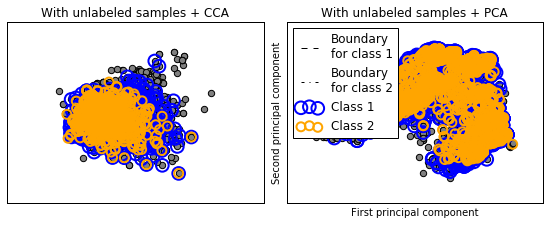

In [31]:
plt.figure(figsize=(8, 6))

X=df3.as_matrix()
Y=genre_matrix

plot_subfigure(X, Y, 1, "With unlabeled samples + CCA", "cca")
plot_subfigure(X, Y, 2, "With unlabeled samples + PCA", "pca")


#plot_subfigure(X, Y, 3, "Without unlabeled samples + CCA", "cca")
#plot_subfigure(X, Y, 4, "Without unlabeled samples + PCA", "pca")

plt.subplots_adjust(.04, .02, .97, .94, .09, .2)
plt.show()

### Now we are going to use train test split to train the model and use hamming loss to measure accuracy.

In [32]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import hamming_loss

my_X=df3.as_matrix()
my_Y=genre_matrix

Xtrain,Xtest,Ytrain,Ytest=train_test_split(my_X,my_Y,test_size=0.5)

In [33]:
myClass = OneVsRestClassifier(SVC(kernel='linear'))
myClass.fit(Xtrain, Ytrain)

print "Finish trainning"

predicts=myClass.predict(Xtest)

print "Finish predict"

print "Hamming_loss score:"
print hamming_loss(Ytest,predicts)

print "Done"


Finish trainning
Finish predict
Hamming_loss score:
0.0966065423418
Done


In [34]:
print hamming_loss(Ytest,predicts)

0.0966065423418


# Classification section

We decided to use two different classifiers. Naive bayes and random forest. We found out that taking out any labels that are above a 1% frequency improved our test scores. In addition, both classifiers gave around the same prediction scores. This can be seen in our boxplot. From our 64% average test score , we can conclude that with our current model, we cannot accurately predict if a person would like an anime based on its video cover. Since our scores were low, we decided that our labels were not meaningful separately. This lead us to group our labels to believe that if we grouped similar labels, we could increase the prediction.

Steps to setup classification:  
+ Setup dataframe from user reviews  
+ Combine user reviews film with labels dataframe called d  
+ Achieve the mean of an individual user and use that as a basis for whether an anime is good or not  
+ Create good column  
+ Do a test train split  
+ Use this to fit into a classification algorithm such as naive bayes and randome forest  

In [35]:
import json
import pandas as pd
users=[]
json_data_path_user='users-1000-min.json'
with open(json_data_path_user,'r') as user_dict_json:
    for line in user_dict_json:
        users.append(json.loads(line))

### Naive Bayes Function

In [36]:
## only users with alot of reviews
from sklearn.naive_bayes import MultinomialNB
import numpy as np
import json
import pandas as pd

def get_score_nb(current_user,df):
    if bool(current_user) == False:
        return
    
    # create column for rating and create colum for whether the anime is good or not
    anime_id=current_user.keys()
    anime_dict={}
    anime_dict["good"] = []
    anime_dict["rating"] = []
    for x in anime_id:
        anime_dict["rating"].append(current_user[x][0])

    avg_rating=np.mean(anime_dict["rating"])

    for x in anime_dict["rating"]:
        if(x>=avg_rating):
            anime_dict["good"].append(1)
        else:
            anime_dict["good"].append(0)

    anime_user_data=pd.DataFrame(anime_dict,index=anime_id)

     #creating test and train data by mergining user data with label data
    df['id']=df['id'].apply(float)
    df['id']=df['id'].apply(int)
    df['id']=df['id'].apply(str)
    anime_id=[str(x) for x in anime_id]
    df_current_user=  df[df['id'].isin(anime_id)]
    anime_user_data=anime_user_data[anime_user_data.index.isin(df_current_user['id'])]
    df_current_user=df_current_user.set_index('id')
    df_current_user.index.name = None
    anime_user_data.sort_index(inplace=True)
    df_current_user.sort_index(inplace=True)
    df_current_user=df_current_user.notnull().astype('int')
    total_data=pd.merge(df_current_user, anime_user_data,left_index=True, right_index=True,how="left")
    total_data= total_data[np.isfinite(total_data['good'])]
    above1percent=[str(x) for x in keys_H30]
    for x in above1percent:
        if x in total_data:
            total_data.drop(x,axis=1,inplace=True)

    train=total_data[:len(total_data)/4]
    test=total_data[len(total_data)/4:]
    
    train_features=train.drop(['good','rating'],axis=1)
    test_features=test.drop(['good','rating'],axis=1)
    if(train_features.empty or test_features.empty or len(train_features.index.values)<50):
        return
    
     #run naive bayes classifier
    clf = MultinomialNB().fit(train_features,train['good'])
    train_score=clf.score(train_features,train['good'])
    test_score=clf.score(test_features,test['good'])

    return (train_score,test_score,len(total_data.index.values))

Naive Bayes results:

In [37]:
scores_nb=[]
for x in range(len(users)):
    score=get_score_nb(users[x]['scores'],df)
    if score!=None:
        scores_nb.append(score)
print 'Number of user: ',len(scores_nb)
test_train_score=zip(*scores_nb)
print 'Train score: ',np.mean(list(test_train_score[0]))
print 'Test score: ', np.mean(list(test_train_score[1]))

Number of user:  795
Train score:  0.687217112105
Test score:  0.641741925326


### Random forest function

In [38]:

from sklearn.ensemble import RandomForestClassifier
import numpy as np
import json
import pandas as pd

def get_score_rfc(current_user,df):
    if bool(current_user) == False:
        return
    
    # create column for rating and create colum for whether the anime is good or not
    anime_id=current_user.keys()
    anime_dict={}
    anime_dict["good"] = []
    anime_dict["rating"] = []
    for x in anime_id:
        anime_dict["rating"].append(current_user[x][0])

    avg_rating=np.mean(anime_dict["rating"])

    for x in anime_dict["rating"]:
        if(x>=avg_rating):
            anime_dict["good"].append(1)
        else:
            anime_dict["good"].append(0)

    anime_user_data=pd.DataFrame(anime_dict,index=anime_id)
    
    #creating test and train data by mergining user data with label data
    df['id']=df['id'].apply(float)
    df['id']=df['id'].apply(int)
    df['id']=df['id'].apply(str)
    anime_id=[str(x) for x in anime_id]
    df_current_user=  df[df['id'].isin(anime_id)]
    anime_user_data=anime_user_data[anime_user_data.index.isin(df_current_user['id'])]
    df_current_user=df_current_user.set_index('id')
    df_current_user.index.name = None
    anime_user_data.sort_index(inplace=True)
    df_current_user.sort_index(inplace=True)
    df_current_user=df_current_user.notnull().astype('int')

    total_data=pd.merge(df_current_user, anime_user_data,left_index=True, right_index=True,how="left")
    total_data= total_data[np.isfinite(total_data['good'])]
    above1percent=[str(x) for x in keys_H30]
    for x in above1percent:
        if x in total_data:
            total_data.drop(x,axis=1,inplace=True)

    train=total_data[:len(total_data)/5]
    test=total_data[len(total_data)/5:]
    
    train_features=train.drop(['good','rating'],axis=1)
    test_features=test.drop(['good','rating'],axis=1)

    if(train_features.empty or test_features.empty or len(train_features.index.values)<25):
        return
    #run random forest classifier
    rfc = RandomForestClassifier(n_estimators=100).fit(train_features,train['good'])
    train_score=rfc.score(train_features,train['good'])
    test_score=rfc.score(test_features,test['good'])

    return (train_score,test_score,len(total_data.index.values))

In [39]:
scores_rfc=[]
for x in range(len(users)):
    score=get_score_rfc(users[x]['scores'],df)
    if score!=None:
        scores_rfc.append(score)
print 'Number of users: ', len(scores_rfc)
test_train_rfc=zip(*scores_rfc)
print 'Train score: ',np.mean(list(test_train_rfc[0]))
print 'Test score: ',np.mean(list(test_train_rfc[1]))

Number of users:  853
Train score:  0.694154963314
Test score:  0.635024215087


#### Boxplot  
As you can see from the boxplot below both algorithms have around the same range.

In [40]:
%matplotlib inline

trace0 = graph_objs.Box(
    y=list(test_train_score[1]),
    name="naive bayes"
)
trace1 = graph_objs.Box(
    y=list(test_train_rfc[1]),
    name="random forest"
)
data = [trace0, trace1]
iplot(data)

#### Random Forest scatter plot

In [41]:
trace0 = graph_objs.Scatter(
    y=list(test_train_rfc[1]),
    x=list(test_train_rfc[2]),
    mode='markers',
    name='users',
    marker=dict(
        line=dict(
            color='rgba(156, 165, 196, 1.0)',
            width=1,
        ),
        symbol='circle',
        size=16,
    )
)
data = [trace0]

layout = dict(title = 'Users for rfc',
              yaxis = dict(zeroline = False,title='test score'),
              xaxis = dict(zeroline = False,title='#of reviews')
             )

fig = dict(data=data, layout=layout)
iplot(fig, filename='styled-scatter')

#### Naive Bayes scatter plot

In [42]:
trace0 = graph_objs.Scatter(
    y=list(test_train_score[1]),
    x=list(test_train_score[2]),
    mode='markers',
    name='users',
    marker=dict(
        line=dict(
            color='rgba(156, 165, 196, 1.0)',
            width=1,
        ),
        symbol='circle',
        size=16,
    )
)
data = [trace0]

layout = dict(title = 'Users for naive bayes',
              yaxis = dict(zeroline = False,title='test score'),
              xaxis = dict(zeroline = False,title='#of reviews')
             )

fig = dict(data=data, layout=layout)
iplot(fig, filename='styled-scatter')

# GENRE BASED CLASSIFICATION

Rather than running our labels alone , we found that that if we could predict the genre of the labels, we could get a better prediction score of 68%. If we use our labels and genres, the prediciton score is around 66%.

In [43]:
json_data_path='anime.json'
#only contain the following fields
fields = ["title","genres"]
output_path='anime-min.json'
anime_dic = {}


with open(json_data_path,'r') as anime_file:
    for anime in anime_file:
        anime=json.loads(anime)
        if anime["_id"]["t"] == "TV":
            #make sure no repeat ids
            if anime["_id"]["i"] in anime_dic:
                print anime["_id"]["i"] + " this key is already there" 
            else:
                temp_anime ={}
                temp_anime["id"]=anime["_id"]["i"]
                for field in fields:
                    temp_anime[field] = anime[field]
                anime_dic[anime["_id"]["i"]] = temp_anime

#write to minfy file
#with open(output_path, 'w+') as f: # overwrite if file exists
#    f.write(json.dumps(anime_dic))

#print anime_dic[1.0]["genres"]

tempList=[]
id_list =[]

for index,row in df.iterrows():
    tempList.append(anime_dic[float(row["id"])]["genres"])
    id_list.append(anime_dic[float(row["id"])]["id"])
    
    


#for index,row in df.iterrows():
#    tempS=""
#    for genre in anime_dic[float(row["id"])]["genres"]:
#        tempS+=genre+" "
#    tempList.append(tempS)

#print len(tempList)
#print len(df)
#print tempList
anime_genre=pd.DataFrame(tempList)
anime_genre["id"]=id_list
anime_genre["id"]=anime_genre["id"].astype(int)
#print len(id_list)
#print len(anime_genre)
#anime_genre["id"]=id_list

In [44]:
from sklearn.preprocessing import MultiLabelBinarizer

myBinarizer=MultiLabelBinarizer()

genre_matrix=myBinarizer.fit_transform(tempList)

print genre_matrix

##print myBinarizer.classes_
print len(genre_matrix)

[[0 1 0 ..., 0 0 0]
 [0 1 0 ..., 0 0 0]
 [0 0 1 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
13084


In [45]:
genre_df=pd.DataFrame(genre_matrix)


genre_df["id"]=id_list

genre_df.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,id
0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,890.0
1,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2151.0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,22507.0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1167.0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5226.0


In [46]:
# test for large testing data only

from sklearn.ensemble import RandomForestClassifier
import numpy as np
import json
import pandas as pd
from sklearn.cross_validation import train_test_split

def get_score_rfc(current_user,df):
    if bool(current_user) == False:
        return
    anime_id=current_user.keys() # create column for rating and create colum for whether the anime is good or not
    anime_dict={}
    anime_dict["good"] = []
    anime_dict["rating"] = []
    for x in anime_id:
        anime_dict["rating"].append(current_user[x][0])

    avg_rating=np.mean(anime_dict["rating"])

    for x in anime_dict["rating"]:
        if(x>=avg_rating):
            anime_dict["good"].append(1)
        else:
            anime_dict["good"].append(0)

    anime_user_data=pd.DataFrame(anime_dict,index=anime_id)
    #
    df['id']=df['id'].apply(float)
    df['id']=df['id'].apply(int)
    df['id']=df['id'].apply(str)
    anime_id=[str(x) for x in anime_id]
    df_current_user=  df[df['id'].isin(anime_id)]
    anime_user_data=anime_user_data[anime_user_data.index.isin(df_current_user['id'])]
    df_current_user=df_current_user.set_index('id')
    df_current_user.index.name = None
    anime_user_data.sort_index(inplace=True)
    df_current_user.sort_index(inplace=True)
    df_current_user=df_current_user.notnull().astype('int')
    #df_current_user=df_current_user.fillna(0)
    total_data=pd.merge(df_current_user, anime_user_data,left_index=True, right_index=True,how="left")
    total_data= total_data[np.isfinite(total_data['good'])]
    #
    train=total_data[:len(total_data)/5]
    test=total_data[len(total_data)/5:]
    
    train_features=train.drop(['good','rating'],axis=1)
    test_features=test.drop(['good','rating'],axis=1)
    
    
    Xtrain,Xtest,Ytrain,Ytest=train_test_split(df_current_user,anime_user_data['good'],test_size=0.7)

    if(Xtrain.empty or Xtest.empty or len(Xtrain.index.values)<150):
        return
 
    rfc = RandomForestClassifier(n_estimators=100).fit(Xtrain,Ytrain)
    train_score=rfc.score(Xtrain,Ytrain)
    test_score=rfc.score(Xtest,Ytest)
    #print 'train score :' ,train_score
    #print 'test score :' ,test_score

    return (train_score,test_score)

In [47]:
genre_df['id']=genre_df['id'].apply(str)
df_genre=genre_df.groupby(['id'],as_index=False).sum()

In [48]:

scores_nb=[]
for x in range(len(users)):
    score=get_score_rfc(users[x]['scores'],df_genre)
    if score!=None:
        scores_nb.append(score)
print 'number of users: ',len(scores_nb)
test_train_score=zip(*scores_nb)
print 'train mean: ',np.mean(list(test_train_score[0]))
print 'test mean: ',np.mean(list(test_train_score[1]))
print 'train max: ',np.max(list(test_train_score[0]))
print 'test max: ',np.max(list(test_train_score[1]))
print 'train min: ',np.min(list(test_train_score[0]))
print 'test min: ',np.min(list(test_train_score[1]))

number of users:  62
train mean:  0.685246248771
test mean:  0.681036898617
train max:  1.0
test max:  1.0
train min:  0.505208333333
test min:  0.436807095344


#### Now, try to use genres + labels as features and predict.

In [49]:
# test for large testing data only

from sklearn.ensemble import RandomForestClassifier
import numpy as np
import json
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report

def get_score_rfc(current_user,df,df2):
    if bool(current_user) == False:
        return
    anime_id=current_user.keys() # create column for rating and create colum for whether the anime is good or not
    anime_dict={}
    anime_dict["good"] = []
    anime_dict["rating"] = []
    for x in anime_id:
        anime_dict["rating"].append(current_user[x][0])

    avg_rating=np.mean(anime_dict["rating"])

    for x in anime_dict["rating"]:
        if(x>=avg_rating):
            anime_dict["good"].append(1)
        else:
            anime_dict["good"].append(0)

    anime_user_data=pd.DataFrame(anime_dict,index=anime_id)
    #
    df['id']=df['id'].apply(float)
    df['id']=df['id'].apply(int)
    df['id']=df['id'].apply(str)
    anime_id=[str(x) for x in anime_id]
    df_current_user=  df[df['id'].isin(anime_id)]
    anime_user_data=anime_user_data[anime_user_data.index.isin(df_current_user['id'])]
    df_current_user=df_current_user.set_index('id')
    df_current_user.index.name = None
    anime_user_data.sort_index(inplace=True)
    df_current_user.sort_index(inplace=True)
    df_current_user=df_current_user.notnull().astype('int')
    
    df2['id']=df2['id'].apply(float)
    df2['id']=df2['id'].apply(int)
    df2['id']=df2['id'].apply(str)
    anime_id=[str(x) for x in anime_id]
    df_current_user_2=  df2[df2['id'].isin(anime_id)]
    df_current_user_2=df_current_user_2.set_index('id')
    df_current_user_2.index.name = None
    df_current_user_2.sort_index(inplace=True)
    df_current_user_2=df_current_user_2.notnull().astype('int')
    
    
    #df_current_user=df_current_user.fillna(0)
    total_data=pd.merge(df_current_user, anime_user_data,left_index=True, right_index=True,how="left")
    total_data= total_data[np.isfinite(total_data['good'])]
    #
    train=total_data[:len(total_data)/5]
    test=total_data[len(total_data)/5:]
    
    train_features=train.drop(['good','rating'],axis=1)
    test_features=test.drop(['good','rating'],axis=1)
    
    
    Xtrain,Xtest,Ytrain,Ytest=train_test_split(df_current_user,anime_user_data['good'],test_size=0.7)
    
    Xtrain2,Xtest2,Ytrain2,Ytest2=train_test_split(df_current_user_2,anime_user_data['good'],test_size=0.7)
    
    if(Xtrain.empty or Xtest.empty or len(Xtrain.index.values)<100):
        return
    
    if(Xtrain2.empty or Xtest2.empty or len(Xtrain2.index.values)<100):
        return
 
    
    rfc = RandomForestClassifier(n_estimators=100).fit(Xtrain,Ytrain)
    
    rfc2 = RandomForestClassifier(n_estimators=100).fit(Xtrain2,Ytrain2)
    
    YTrainRes1=rfc.predict(Xtrain)
    YTrainRes2=rfc2.predict(Xtrain2)
    
    YTestRes1=rfc.predict(Xtest)
    YTestRes2=rfc2.predict(Xtest2)
    
    YTrainFinal=[]
    
    YTrainFinal=np.logical_or(YTrainRes1.astype(bool),YTrainRes2.astype(bool))
    
    YTestFinal=np.logical_or(YTestRes1.astype(bool),YTestRes2.astype(bool))
    
    
    train_score=np.mean(np.equal(YTrainFinal,Ytrain.astype(bool)).astype(int))
    test_score=np.mean(np.equal(YTestFinal,Ytest.astype(bool)).astype(int))
    
    return (train_score,test_score)

In [50]:
df_test=df.groupby(['id'],as_index=False).sum() # group similar ids

In [51]:
scores_nb=[]
for x in range(len(users)):
    score=get_score_rfc(users[x]['scores'],df_test,df_genre)
    if score!=None:
        scores_nb.append(score)
print len(scores_nb)
test_train_score=zip(*scores_nb)
print 'train mean: ',np.mean(list(test_train_score[0]))
print 'test mean: ',np.mean(list(test_train_score[1]))
print 'train max: ',np.max(list(test_train_score[0]))
print 'test max: ',np.max(list(test_train_score[1]))
print 'train min: ',np.min(list(test_train_score[0]))
print 'test min: ',np.min(list(test_train_score[1]))

134
train mean:  0.665706929382
test mean:  0.661624539852
train max:  1.0
test max:  1.0
train min:  0.48
test min:  0.440476190476


# CONCLUSION

Can we judge a video by its cover? No, but our feature based recommendation system does looks promising for the future.


Humans have a very big discrepancy in terms of what they watch, we believe this threw off the binary classification for predicting what the people liked. While the i2v label generator gave us useful labels such as gun,military uniform, and musical note, most of the time these labels gave us very descriptive ideas of the setting and characters. These descriptive labels weren’t as good at recognizing other features that we believe would be better to predict . Amount of labels as another issue, on one hand, i2v gave us too few labels per image, even if we have multiple images for each anime, on the other hand, users tend to have little amount of ratings, limiting the amount of features, which is important in our feature based recommendation. 

However, our genre predictor based on the i2v labels did very well showing over 90% accuracy.  In addition, when we used our genre in our feature based recommendation system we found that we get an increase to 68% average predictor score from it's old 64% accuracy.


In future work increasing the features and labels for each photo by using additional libraries would be a great help to the accuracy of the algorithm. Another possible ideas would be collecting more images for each anime by extracting screenshots from trailers and the anime itself. If we reinforce this system with more labels, our genre based predictor, and labels taken from collaborative filtering, it has the potential to create an even better recommender structure.